# Example for shifting an image in fourier space:

Here nothing is optimized. 
1. Decompose image using FFT
2. Apply a phase shift in fourier domain
3. Reoconstruct the image --> image is shifted spatially

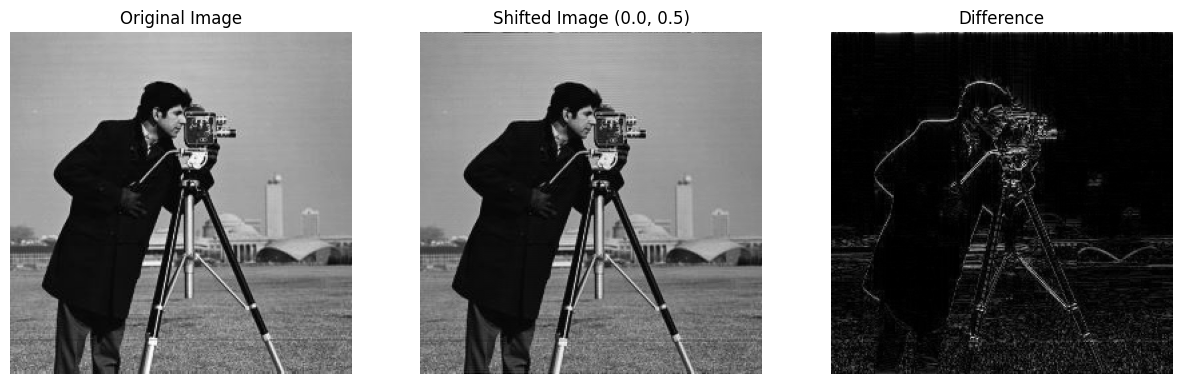

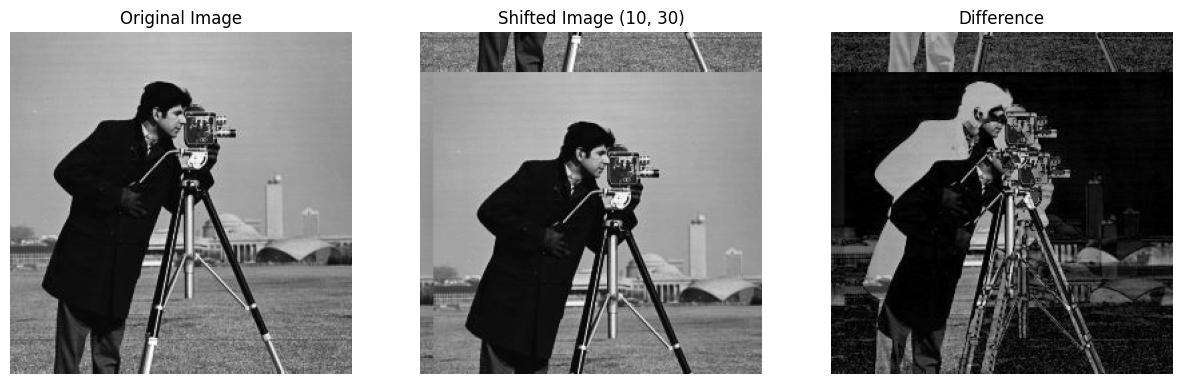

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_image(image_path, grayscale=True):
    """Load image and convert to grayscale if needed."""
    img = Image.open(image_path)
    if grayscale:
        img = img.convert("L")  # Convert to grayscale
    return np.array(img, dtype=np.float32) / 255.0  # Normalize to [0,1]

def apply_fft(image):
    """Apply Fourier Transform to get frequency domain representation."""
    return np.fft.fft2(image)

def shift_image_in_frequency_domain(fft_image, shift_x, shift_y):
    """Modify phase of sine components to shift the image."""
    h, w = fft_image.shape
    # Create shift matrices for x and y directions
    x = np.fft.fftfreq(w) * w  # Frequency values along x
    y = np.fft.fftfreq(h) * h  # Frequency values along y
    X, Y = np.meshgrid(x, y)  # Create 2D frequency grid
    
    # Compute phase shift term: exp(-j * 2π * (fx * shift_x + fy * shift_y))
    phase_shift = np.exp(-2j * np.pi * (X * shift_x / w + Y * shift_y / h))
    
    # Apply phase shift to FFT
    shifted_fft_image = fft_image * phase_shift
    return shifted_fft_image

def apply_ifft(fft_image):
    """Reconstruct image from frequency domain."""
    return np.abs(np.fft.ifft2(fft_image))

def process_and_shift_image(image_path, shift_x, shift_y):
    """Load, transform, shift, and reconstruct an image."""
    # Step 1: Load the image
    image = load_image(image_path)
    
    # Step 2: Apply FFT to decompose into sine functions
    fft_image = apply_fft(image)
    
    # Step 3: Modify phase for shifting
    shifted_fft_image = shift_image_in_frequency_domain(fft_image, shift_x, shift_y)
    
    # Step 4: Apply inverse FFT to reconstruct shifted image
    shifted_image = apply_ifft(shifted_fft_image)
    
    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(shifted_image, cmap="gray")
    ax[1].set_title(f"Shifted Image ({shift_x}, {shift_y})")
    ax[1].axis("off")

    # plot the difference in the third subplot
    diff = np.abs(image - shifted_image)
    ax[2].imshow(diff, cmap="gray")
    ax[2].set_title("Difference")
    ax[2].axis("off")
    
    plt.show()
    
    return shifted_image

# Example usage:
image_path = "/home/nlang/data/images/cameraman.jpg"

# subpixel shifts
shift_x, shift_y = 0., 0.5  # Shift amounts in pixels
shifted_image = process_and_shift_image(image_path, shift_x, shift_y)

# large shifts
shift_x, shift_y = 10, 30  # Shift amounts in pixels
shifted_image = process_and_shift_image(image_path, shift_x, shift_y)
